In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

In [2]:
import time
import matplotlib.pyplot as plt
import utils
%matplotlib inline

In [3]:
data_file = 'data/birth_life_2010.txt'

In [4]:
data, n_samples = utils.read_birth_life_data(data_file)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((data[:, 0], data[:, 1]))

In [6]:
w = tfe.Variable(0.0)
b = tfe.Variable(0.0)

In [7]:
def prediction(x):
    return x*w + b

In [8]:
def squared_loss(y, y_pred):
    return (y - y_pred)**2
    

In [9]:
def hubber_loss(y, y_pred, m = 1.0):
    t = y - y_pred
    return t**2 if tf.abs(t) <=m else m*(2*tf.abs(t) - m)

In [10]:
def train(loss_function):
    print('Training model for loss function:' + loss_function.__name__)
    optimizer  = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    def loss_function_example(x_i, y_i):
        return loss_function(y_i, prediction(x_i))
    grad = tfe.implicit_value_and_gradients(loss_function_example)
    start = time.time()
    for epoch in range(100):
        total_loss = 0
        for x_i, y_i in tfe.Iterator(dataset):
            loss, gradients = grad(x_i, y_i)
            optimizer.apply_gradients(gradients)
            total_loss += loss
        print('Epoch {0}: {1}'.format(epoch, total_loss / n_samples))
    print('Took: %f seconds' % (time.time() - start))
                
            
            

In [13]:
train(hubber_loss)

Training model for loss function:hubber_loss
Epoch 0: 7.389145374298096
Epoch 1: 7.389145374298096
Epoch 2: 7.389145374298096
Epoch 3: 7.389145374298096
Epoch 4: 7.389145374298096
Epoch 5: 7.389145374298096
Epoch 6: 7.389145374298096
Epoch 7: 7.389145374298096
Epoch 8: 7.389145374298096
Epoch 9: 7.389145374298096
Epoch 10: 7.389145374298096
Epoch 11: 7.389145374298096
Epoch 12: 7.389145374298096
Epoch 13: 7.389145374298096
Epoch 14: 7.389145374298096
Epoch 15: 7.389145374298096
Epoch 16: 7.389145374298096
Epoch 17: 7.389145374298096
Epoch 18: 7.389145374298096
Epoch 19: 7.389145374298096
Epoch 20: 7.389145374298096
Epoch 21: 7.389145374298096
Epoch 22: 7.389145374298096
Epoch 23: 7.389145374298096
Epoch 24: 7.389145374298096
Epoch 25: 7.389145374298096
Epoch 26: 7.389145374298096
Epoch 27: 7.389145374298096
Epoch 28: 7.389145374298096
Epoch 29: 7.389145374298096
Epoch 30: 7.389145374298096
Epoch 31: 7.389145374298096
Epoch 32: 7.389145374298096
Epoch 33: 7.389145374298096
Epoch 34: 7.3

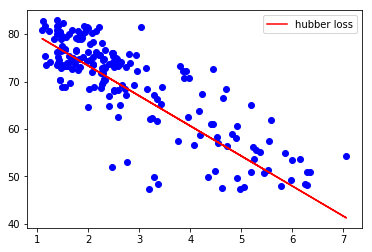

In [19]:
plt.plot(data[:, 0], data[:, 1], 'bo')
plt.plot(data[:, 0], data[:, 0]*w + b, 'r-', label = 'hubber loss')
plt.legend()
